#**Support Vector Regression**

##Load and Explore the Data Set

In [1]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [2]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [4]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


###Feature Scaling (Very Import For SVR)

In [9]:
from sklearn.preprocessing import StandardScaler

X=df[['Years of Experience']].values
y=df[['Salary']].values

sc_X=StandardScaler()
sc_y=StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

###Flatten y for SVR

In [10]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [11]:
y_scaled=y_scaled.ravel()

In [12]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

###Train SVR Model(RBF Kernel)

In [13]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf', C=100,epsilon=0.1)
svr.fit(X_scaled,y_scaled)

SVR(C=100)

###Predictions and Inverse Scaling

In [14]:
y_pred_scaled=svr.predict(X_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [15]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [16]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

##Visualization Actual vs Predicted

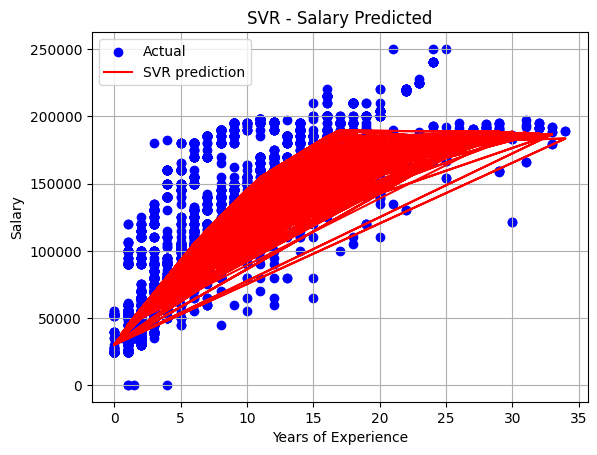

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color='blue',label='Actual')
plt.plot(X,y_pred,color='red',label="SVR prediction")
plt.title('SVR - Salary Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

### Evaluate Model performance

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y,y_pred)

print("MSE:",mse)
print("RMSE",rmse)
print("R2 Score:",r2)

MSE: 759013901.8514212
RMSE 27550.20692937571
R2 Score: 0.7275580175081495


###Compare kernels using Code

kernel : linear R2 Score for : 0.6326


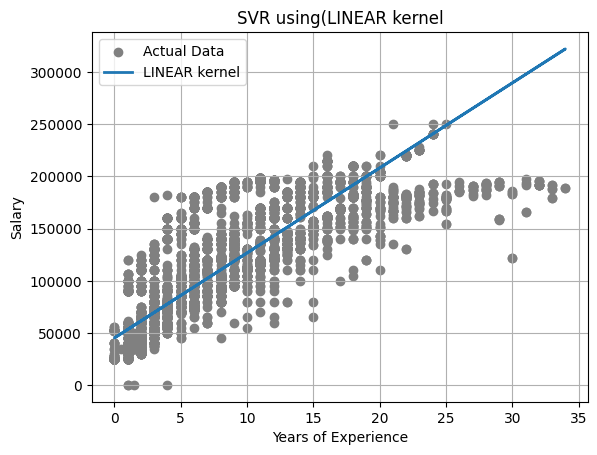

kernel : poly R2 Score for : -0.0216


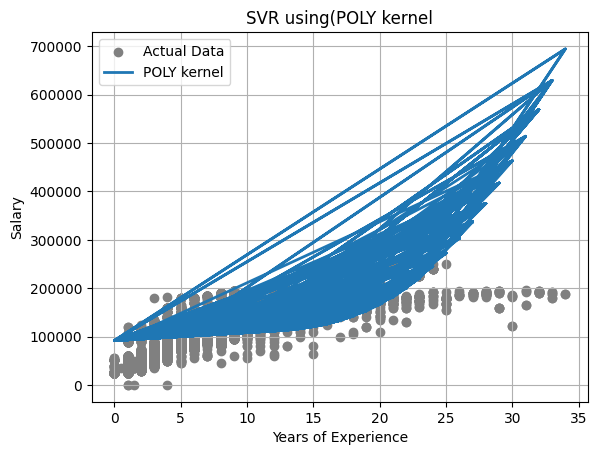

kernel : rbf R2 Score for : 0.7249


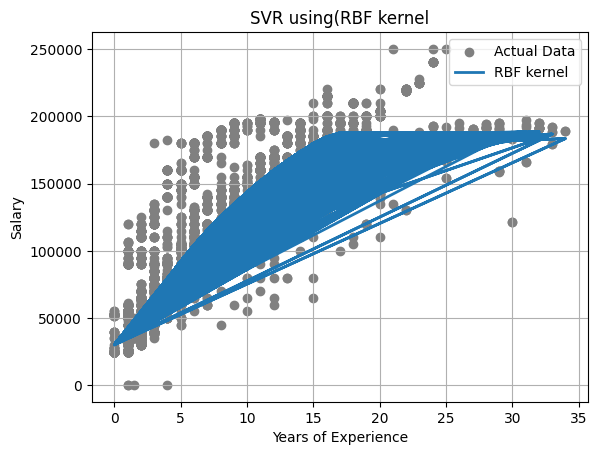

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#1.Load And Scale Data
X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y).ravel() #Flatten y

#2.define Kerenels
kernels = ['linear', 'poly', 'rbf']

#3.Train and Evaluate Models
for kernel in kernels:
  if kernel == 'poly':
    model = SVR(kernel=kernel, degree=3)
  else:
    model = SVR(kernel=kernel)
  model.fit(X_scaled,y_scaled)

  #4.predict For Training Data
  y_pred_scaled = model.predict(X_scaled)
  y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

  #5.Evaluation
  score=r2_score(y,y_pred)
  print(f"kernel : {kernel} R2 Score for : {score:.4f}")

  #6.Plot
  plt.scatter(X,y,color='gray',label='Actual Data')
  plt.plot(X,y_pred,label=f'{kernel.upper()} kernel',linewidth='2')
  plt.title(f'SVR using({kernel.upper()} kernel' )
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.legend()
  plt.show()


###Train Different C and Epsilon Values

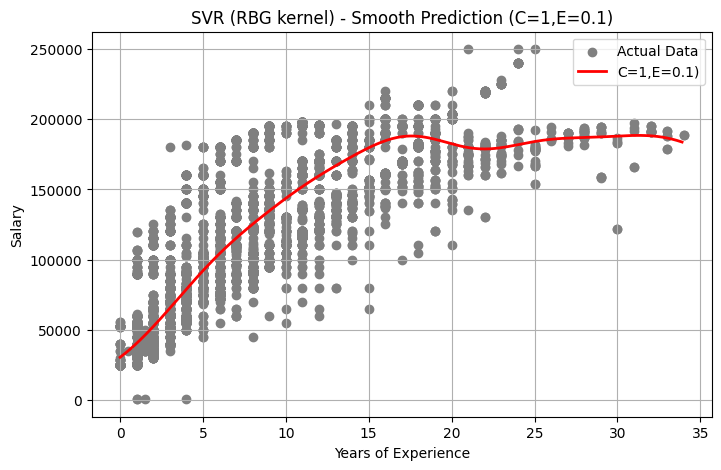

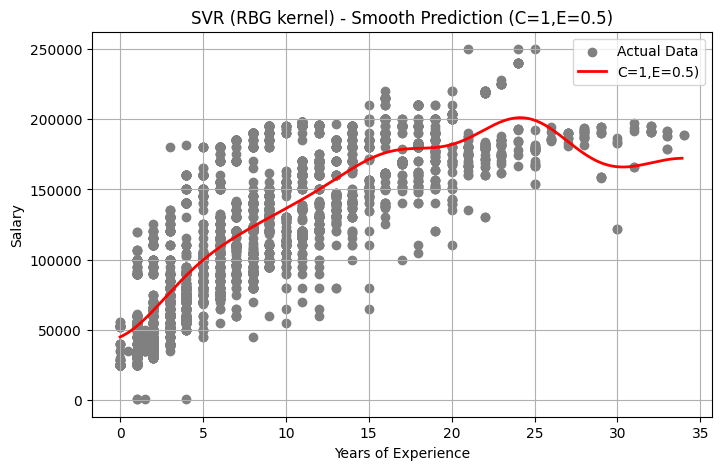

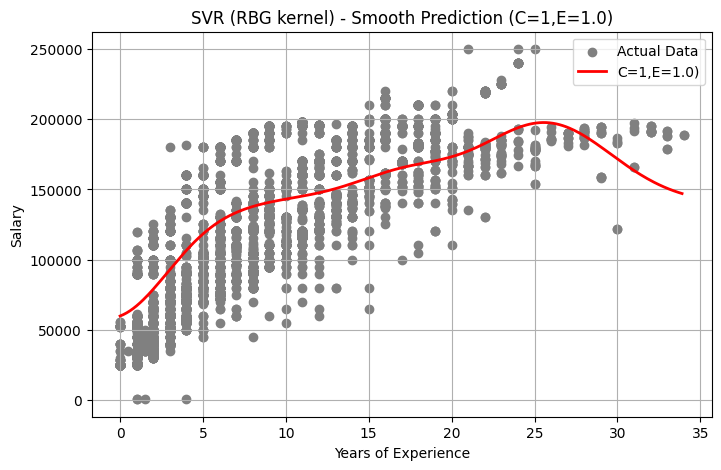

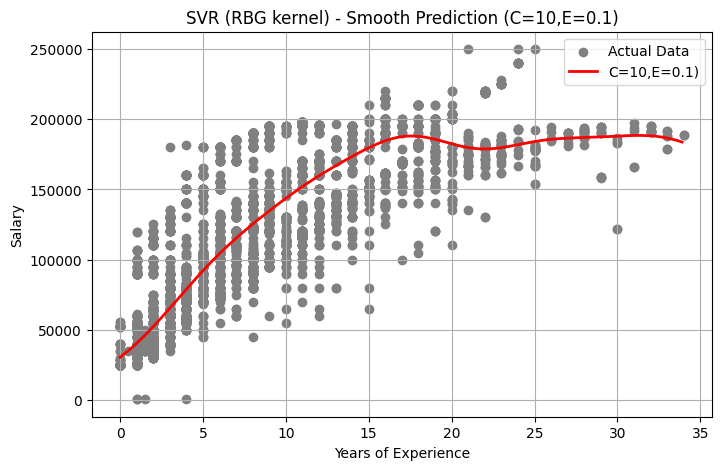

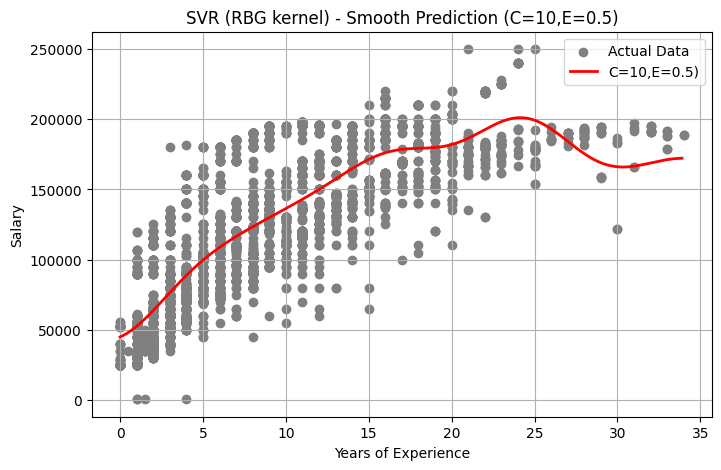

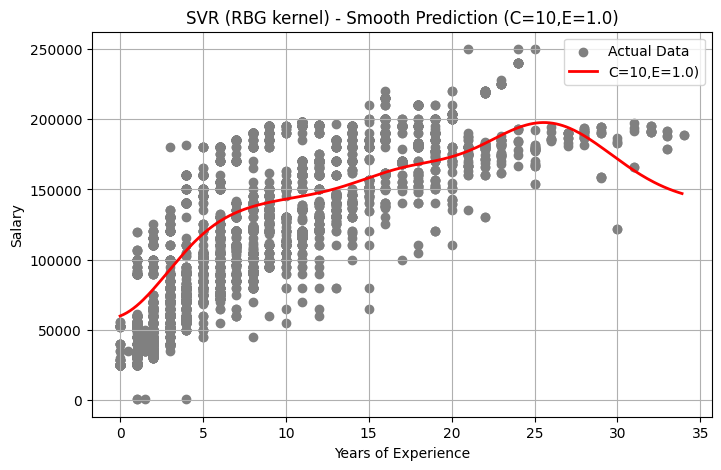

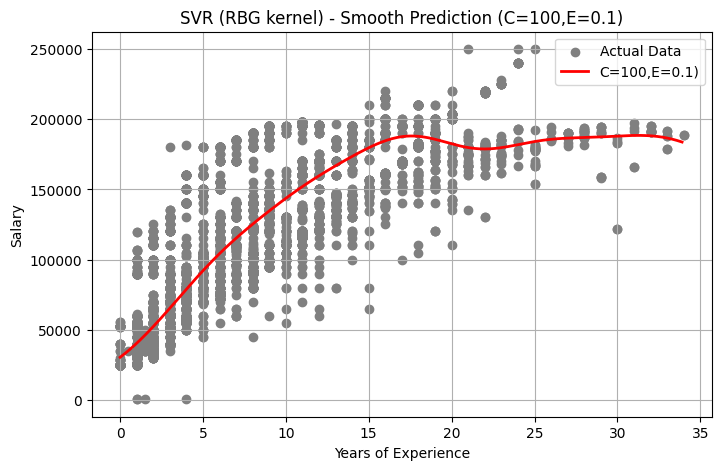

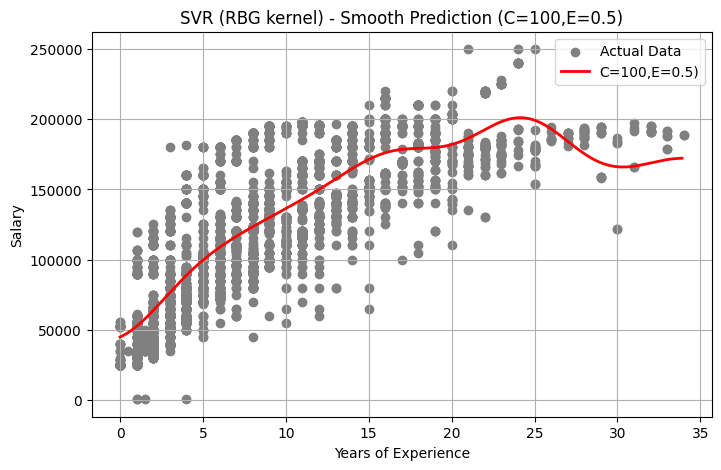

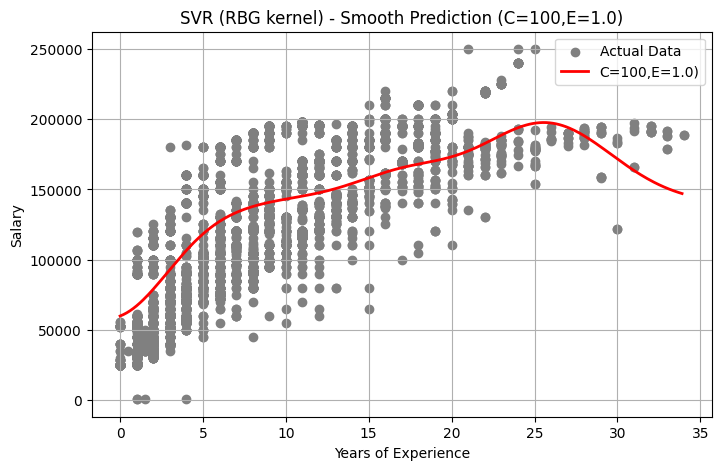

In [32]:
C_values = [1,10,100]
epslion_values = [0.1,0.5,1.0]

X_grid = np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid = X_grid.reshape(-1,1)

X_grid_scaled = sc_X.transform(X_grid)

for c in C_values:
  for eps in epslion_values:
    model=SVR(kernel='rbf',C=c,epsilon=eps)
    model.fit(X_scaled,y_scaled)

    y_pred_scaled=model.predict(X_grid_scaled)
    y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

    plt.figure(figsize=(8,5))
    plt.scatter(X,y,color='gray',label='Actual Data')
    plt.plot(X_grid,y_pred,color='red',label=f'C={c},E={eps})',linewidth=2)
    plt.title(f'SVR (RBG kernel) - Smooth Prediction (C={c},E={eps})')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.legend()